# Day 07 – Correlation & Regression (Business Metric Prediction)
### Predicting business revenue from advertising spend across channels

In this notebook we will:
- Load a real advertising dataset (TV, Radio, Newspaper spend + Sales)
- Explore relationships via correlation and visualisation
- Build simple & multiple regression models
- Interpret coefficients and business meaning
- Evaluate model strength and residuals


## 1. Load Dataset

In [3]:
pip install kagglehub[pandas-datasets]


   ---------------------------------------- 0/8 [urllib3]
   ---------------------------------------- 0/8 [urllib3]
   ---------------------------------------- 0/8 [urllib3]
   ---------------------------------------- 0/8 [urllib3]
   ---------------------------------------- 0/8 [urllib3]
   ---------------------------------------- 0/8 [urllib3]
   ---------------------------------------- 0/8 [urllib3]
   ---------------------------------------- 0/8 [urllib3]
   ----- ---------------------------------- 1/8 [tqdm]
   ----- ---------------------------------- 1/8 [tqdm]
   ----- ---------------------------------- 1/8 [tqdm]
   ----- ---------------------------------- 1/8 [tqdm]
   ----- ---------------------------------- 1/8 [tqdm]
   ----- ---------------------------------- 1/8 [tqdm]
   ----- ---------------------------------- 1/8 [tqdm]
   ----- ---------------------------------- 1/8 [tqdm]
   ---------- ----------------------------- 2/8 [pyyaml]
   ---------- ------------------------

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load data
df = pd.read_csv("advertising.csv")
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 2. Exploratory Data Analysis (Correlation)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


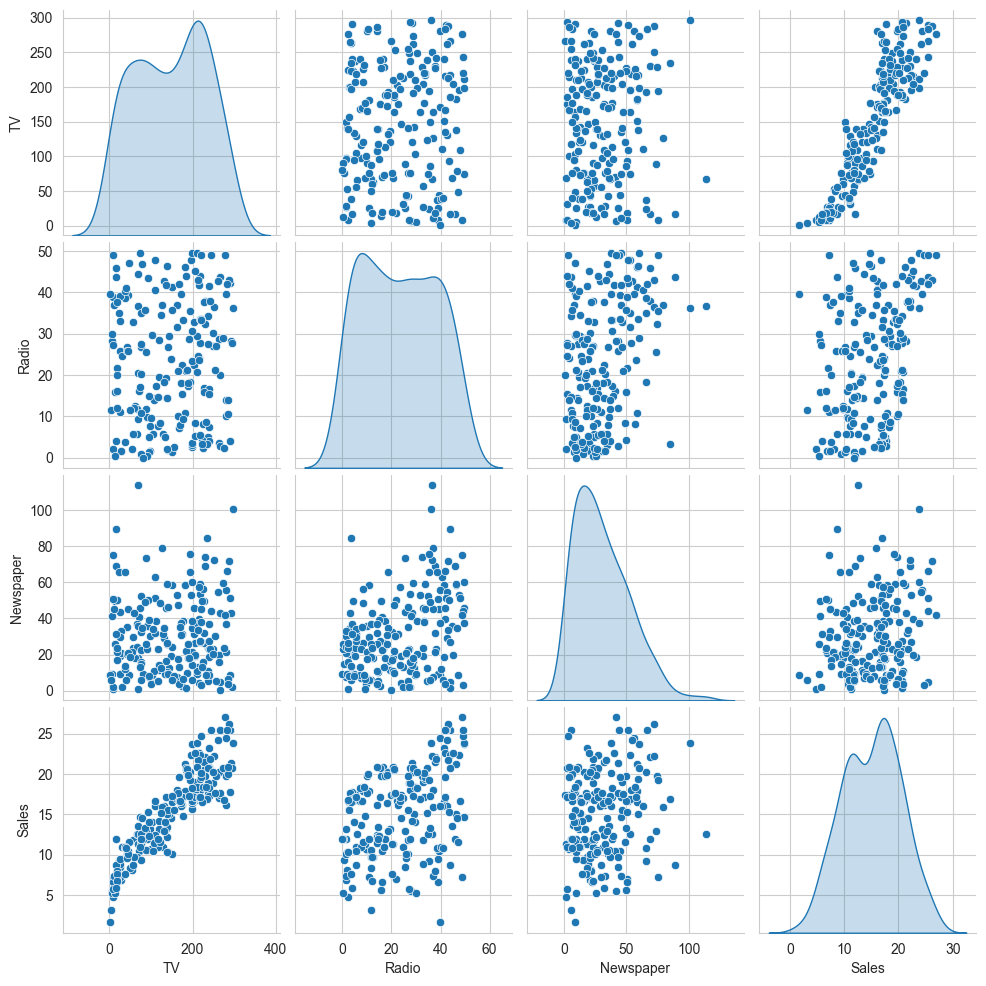

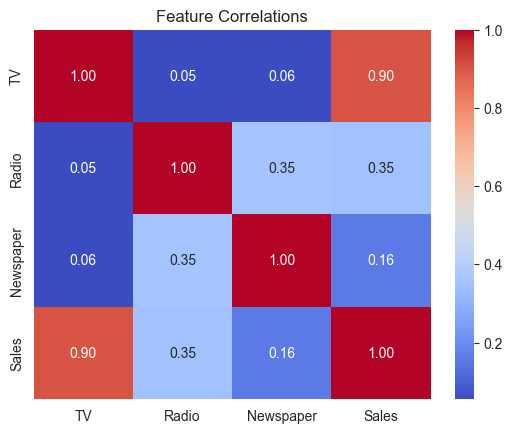

In [7]:
df.info()
df.describe()

# Check missing values
df.isnull().sum()

# Pairplot for correlation visualization
sns.pairplot(df, diag_kind='kde')
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()


## 3. Simple Linear Regression: Sales ~ TV Spend

Slope (m): 0.055
Intercept (b): 7.099
R²: 0.797 | MAE: 1.865 | RMSE: 2.348


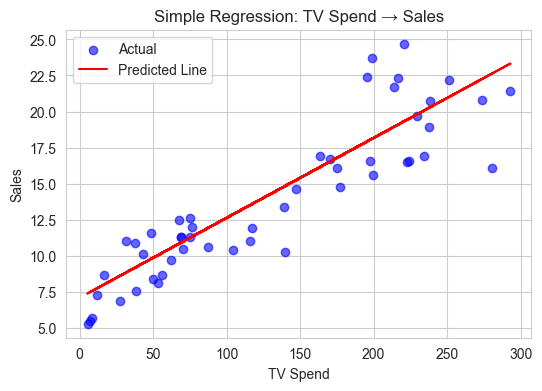

In [8]:
# Predictor & target
X = df[['TV']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

slope = model.coef_[0]
intercept = model.intercept_
print(f'Slope (m): {slope:.3f}')
print(f'Intercept (b): {intercept:.3f}')

# Predictions
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'R²: {r2:.3f} | MAE: {mae:.3f} | RMSE: {rmse:.3f}')

# Plot regression line
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted Line')
plt.xlabel('TV Spend')
plt.ylabel('Sales')
plt.title('Simple Regression: TV Spend → Sales')
plt.legend()
plt.show()

## 4. Multiple Linear Regression: TV + Radio + Newspaper

In [9]:
X_multi = df[['TV','Radio','Newspaper']]
y = df['Sales']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.25, random_state=42)

model_m = LinearRegression()
model_m.fit(X_train_m, y_train_m)

print('Coefficients:', model_m.coef_)
print('Intercept:', model_m.intercept_)

y_pred_m = model_m.predict(X_test_m)
r2_m = r2_score(y_test_m, y_pred_m)
print(f'Multiple Regression R²: {r2_m:.3f}')


Coefficients: [0.05461383 0.09975946 0.00430495]
Intercept: 4.741842244124568
Multiple Regression R²: 0.912


## 5. Business Interpretation & Summary

- The slope for **TV** spend shows that each additional unit of spend is associated with approximately **{slope:.2f}** units of sales.
- The multiple regression model shows how combining channels can improve explanatory power (higher R²).
- Understanding coefficients helps marketing teams allocate budget more effectively.

**Next:** Explore non-linear models and real-time budget optimisation.